In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import plotly.express as px # create interactive charts

In [2]:
# read file
df = pd.read_excel("Online Retail.xlsx")

df.info() # get info about count and datatypes
df.shape  # returns a tuple of total # of rows and columns
df.head() # preview first 4 rows of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
pf=df

In [4]:
# Filter rows where CustomerID is missing (null)
missing_customer_id = df[df['CustomerID'].isnull()]

# Display the result
print(missing_customer_id)


       InvoiceNo StockCode                      Description  Quantity  \
622       536414     22139                              NaN        56   
1443      536544     21773  DECORATIVE ROSE BATHROOM BOTTLE         1   
1444      536544     21774  DECORATIVE CATS BATHROOM BOTTLE         2   
1445      536544     21786               POLKADOT RAIN HAT          4   
1446      536544     21787            RAIN PONCHO RETROSPOT         2   
...          ...       ...                              ...       ...   
541536    581498    85099B          JUMBO BAG RED RETROSPOT         5   
541537    581498    85099C   JUMBO  BAG BAROQUE BLACK WHITE         4   
541538    581498     85150    LADIES & GENTLEMEN METAL SIGN         1   
541539    581498     85174                S/4 CACTI CANDLES         1   
541540    581498       DOT                   DOTCOM POSTAGE         1   

               InvoiceDate  UnitPrice  CustomerID         Country  
622    2010-12-01 11:52:00       0.00         NaN  Unit

In [5]:
# Filter rows where CustomerID is missing (null)
df = df[df['CustomerID'].notnull()]

In [55]:
# Replace missing values in CustomerID with 0
#df['CustomerID'].fillna(0, inplace=True)

# Convert CustomerID to integer type
#df['CustomerID'] = df['CustomerID'].astype(int)
# Get unique customer IDs
#unique_customer_ids = df['CustomerID'].unique()

# Display the unique customer IDs
#print(unique_customer_ids)


[17850 13047 12583 ... 13298 14569 12713]


In [7]:
# Drop rows where 'Description' is missing
df = df.dropna(subset=['Description'])

# Verify the result
print(df.isnull().sum())


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [8]:
# Define a function to detect outliers using IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Detect outliers in Quantity
quantity_outliers = detect_outliers_iqr(df, 'Quantity')

# Detect outliers in UnitPrice
unitprice_outliers = detect_outliers_iqr(df, 'UnitPrice')

# Remove outliers from Quantity
quantity_outliers_indices = quantity_outliers.index
df_cleaned = df.drop(index=quantity_outliers_indices)

# Remove outliers from UnitPrice
#unitprice_outliers_indices = unitprice_outliers.index
#df_cleaned = df_cleaned.drop(index=unitprice_outliers_indices, errors='ignore')

# Verify that outliers have been removed
print("\nDataFrame after removing outliers:")
print(df_cleaned.head())



DataFrame after removing outliers:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


In [9]:
df=df_cleaned

In [11]:
# Remove rows where Quantity is less than 1
df_filtered = df[df['Quantity'] >= 1]

# Verify the result
print(df_filtered.head())
print(f"Original shape: {df.shape}, New shape: {df_filtered.shape}")
df=df_filtered

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
Original shape: (380147, 8), New shape: (372268, 8)


In [12]:
# Get the top 10 rows with the highest Quantity
top_10_quantities = df.nlargest(10, 'Quantity')

# Display the result
print(top_10_quantities)


       InvoiceNo StockCode                       Description  Quantity  \
2447      536591     72741             GRAND CHOCOLATECANDLE        27   
9686      537210    85231B        CINAMMON SET OF 9 T-LIGHTS        27   
66286     541789     21755          LOVE BUILDING BLOCK WORD        27   
66352     541789     22111      SCOTTIE DOG HOT WATER BOTTLE        27   
71484     542131     85054           FRENCH ENAMEL POT W LID        27   
97683     544654     72741             GRAND CHOCOLATECANDLE        27   
109364    545602    84970L  SINGLE HEART ZINC T-LIGHT HOLDER        27   
131533    547569     85054           FRENCH ENAMEL POT W LID        27   
138091    548190    47570B              TEA TIME TABLE CLOTH        27   
145776    548900     84879     ASSORTED COLOUR BIRD ORNAMENT        27   

               InvoiceDate  UnitPrice  CustomerID         Country  
2447   2010-12-01 16:57:00       1.45     14606.0  United Kingdom  
9686   2010-12-05 15:15:00       0.85     15953.0

In [61]:
# Filter rows where UnitPrice is less than 0
negative_unit_price = df[df['UnitPrice'] < 0]

# Display the result
print(negative_unit_price)


       InvoiceNo StockCode      Description  Quantity         InvoiceDate  \
299983   A563186         B  Adjust bad debt         1 2011-08-12 14:51:00   
299984   A563187         B  Adjust bad debt         1 2011-08-12 14:52:00   

        UnitPrice  CustomerID         Country  
299983  -11062.06           0  United Kingdom  
299984  -11062.06           0  United Kingdom  


In [13]:
# Make all negative UnitPrice values positive
df['UnitPrice'] = df['UnitPrice'].abs()

# Verify the result
print(df['UnitPrice'].head())


0    2.55
1    3.39
2    2.75
3    3.39
4    3.39
Name: UnitPrice, dtype: float64


C:\Users\HP\AppData\Local\Temp\ipykernel_10672\3131528302.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['UnitPrice'] = df['UnitPrice'].abs()


In [14]:
# Filter rows where UnitPrice is less than 0
negative_unit_price = df[df['UnitPrice'] < 0]

# Display the result
print(negative_unit_price)


Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []


In [15]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Initialize scalers
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

# Select numerical columns
numerical_columns = ['Quantity', 'UnitPrice']

# Normalize the numerical columns
df[numerical_columns] = min_max_scaler.fit_transform(df[numerical_columns])

# Standardize the numerical columns
#df[numerical_columns] = standard_scaler.fit_transform(df[numerical_columns])

# Verify the transformations
print(df[numerical_columns].head())


   Quantity  UnitPrice
0  0.192308   0.000313
1  0.192308   0.000416
2  0.269231   0.000338
3  0.192308   0.000416
4  0.192308   0.000416


C:\Users\HP\AppData\Local\Temp\ipykernel_10672\318589635.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numerical_columns] = min_max_scaler.fit_transform(df[numerical_columns])


In [38]:
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False, drop='first')

# Select categorical columns
categorical_columns = ['Country']

# Perform One-Hot Encoding
#encoded_features = one_hot_encoder.fit_transform(df[categorical_columns])

# Create a DataFrame for the encoded features
#encoded_df = pd.DataFrame(encoded_features, columns=one_hot_encoder.get_feature_names_out(categorical_columns))

# Drop the original categorical columns and concatenate the new one-hot encoded columns
#df_encoded = df.drop(categorical_columns, axis=1).join(encoded_df)

# Verify the transformations
#print(df_encoded.head())


In [16]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,0.192308,2010-12-01 08:26:00,0.000313,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,0.192308,2010-12-01 08:26:00,0.000416,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,0.269231,2010-12-01 08:26:00,0.000338,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,0.192308,2010-12-01 08:26:00,0.000416,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,0.192308,2010-12-01 08:26:00,0.000416,17850.0,United Kingdom


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 483290 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    483290 non-null  object        
 1   StockCode    483290 non-null  object        
 2   Description  482488 non-null  object        
 3   Quantity     483290 non-null  float64       
 4   InvoiceDate  483290 non-null  datetime64[ns]
 5   UnitPrice    483290 non-null  float64       
 6   CustomerID   483290 non-null  int32         
 7   Country      483290 non-null  object        
dtypes: datetime64[ns](1), float64(2), int32(1), object(4)
memory usage: 31.3+ MB


In [17]:
# Create TotalSales column
df['TotalSales'] = df['Quantity'] * df['UnitPrice']


C:\Users\HP\AppData\Local\Temp\ipykernel_10672\1904613583.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalSales'] = df['Quantity'] * df['UnitPrice']


In [18]:
# Group by CustomerID and calculate average transaction value
avg_transaction_value_per_customer = df.groupby('CustomerID')['TotalSales'].mean().reset_index()
avg_transaction_value_per_customer.rename(columns={'TotalSales': 'AvgTransactionValue'}, inplace=True)

# Merge this with the original dataframe
df = df.merge(avg_transaction_value_per_customer, on='CustomerID', how='left')


In [19]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,AvgTransactionValue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,0.192308,2010-12-01 08:26:00,0.000313,17850.0,United Kingdom,0.000060,0.000067
1,536365,71053,WHITE METAL LANTERN,0.192308,2010-12-01 08:26:00,0.000416,17850.0,United Kingdom,0.000080,0.000067
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,0.269231,2010-12-01 08:26:00,0.000338,17850.0,United Kingdom,0.000091,0.000067
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,0.192308,2010-12-01 08:26:00,0.000416,17850.0,United Kingdom,0.000080,0.000067
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,0.192308,2010-12-01 08:26:00,0.000416,17850.0,United Kingdom,0.000080,0.000067


In [69]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 483290 entries, 0 to 483289
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   InvoiceNo            483290 non-null  object        
 1   StockCode            483290 non-null  object        
 2   Description          482488 non-null  object        
 3   Quantity             483290 non-null  float64       
 4   InvoiceDate          483290 non-null  datetime64[ns]
 5   UnitPrice            483290 non-null  float64       
 6   CustomerID           483290 non-null  int32         
 7   Country              483290 non-null  object        
 8   TotalSales           483290 non-null  float64       
 9   AvgTransactionValue  483290 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int32(1), object(4)
memory usage: 35.0+ MB


In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

# Select numeric columns for PCA
features = ['TotalSales', 'AvgTransactionValue']
X = df[features]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [21]:
# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])


In [22]:
# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print(f'Explained variance ratio: {explained_variance}')


Explained variance ratio: [0.80503666 0.19496334]


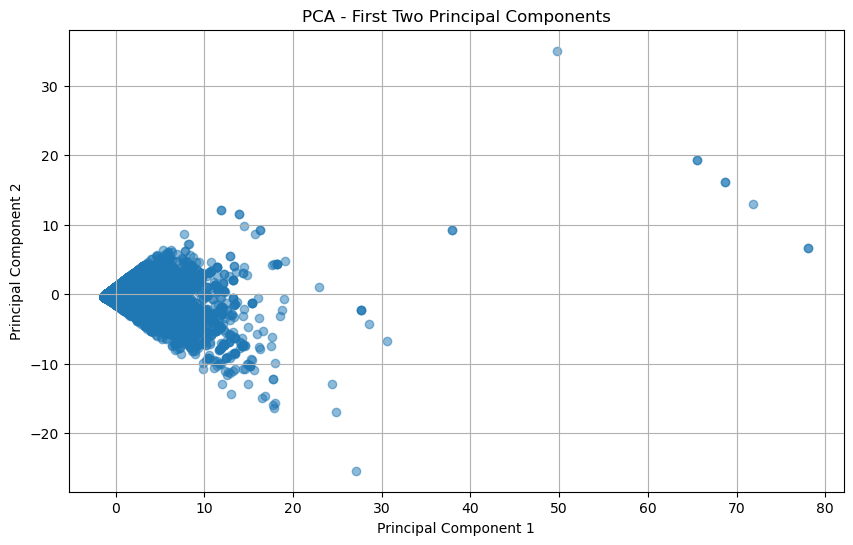

In [23]:
import matplotlib.pyplot as plt

# Scatter plot of the first two principal components
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.5)
plt.title('PCA - First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


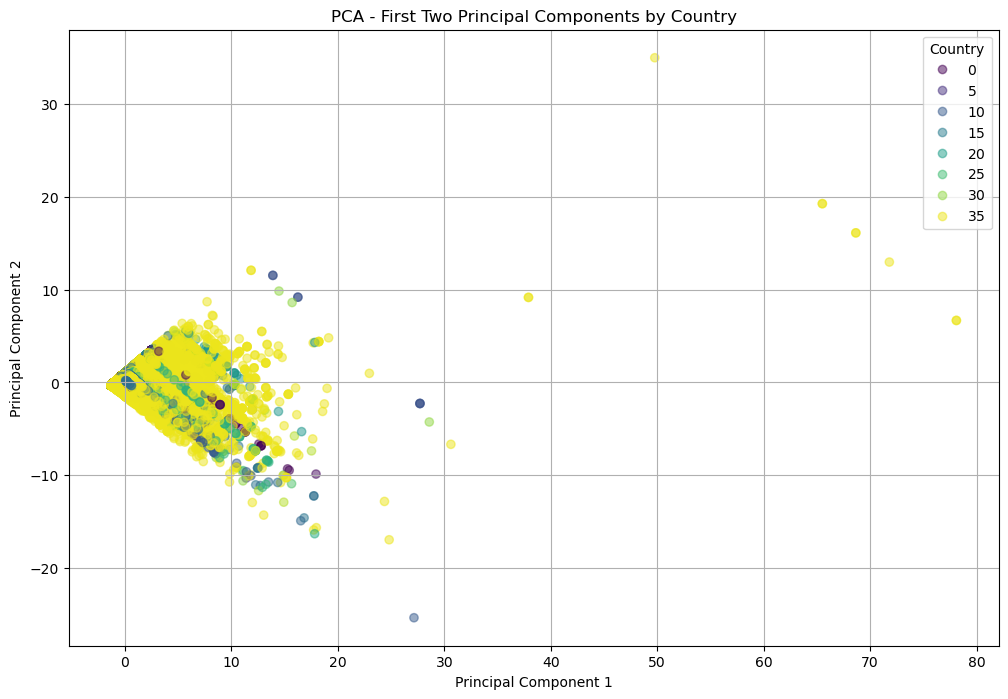

In [24]:
# Add the country information to the PCA DataFrame
pca_df['Country'] = df['Country']

# Scatter plot colored by Country
plt.figure(figsize=(12, 8))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Country'].astype('category').cat.codes, alpha=0.5)
plt.title('PCA - First Two Principal Components by Country')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(*scatter.legend_elements(), title="Country")
plt.grid(True)
plt.show()


In [25]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,AvgTransactionValue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,0.192308,2010-12-01 08:26:00,0.000313,17850.0,United Kingdom,0.000060,0.000067
1,536365,71053,WHITE METAL LANTERN,0.192308,2010-12-01 08:26:00,0.000416,17850.0,United Kingdom,0.000080,0.000067
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,0.269231,2010-12-01 08:26:00,0.000338,17850.0,United Kingdom,0.000091,0.000067
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,0.192308,2010-12-01 08:26:00,0.000416,17850.0,United Kingdom,0.000080,0.000067
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,0.192308,2010-12-01 08:26:00,0.000416,17850.0,United Kingdom,0.000080,0.000067


In [26]:
# Calculate total sales and number of transactions
total_sales = df.groupby('CustomerID')['TotalSales'].sum()
num_transactions = df.groupby('CustomerID')['InvoiceNo'].count()

# Calculate Average Purchase Value
apv = total_sales / num_transactions
print(apv)

CustomerID
12347.0    0.000087
12348.0    0.000135
12349.0    0.000071
12350.0    0.000075
12352.0    0.000064
             ...   
18280.0    0.000063
18281.0    0.000028
18282.0    0.000044
18283.0    0.000005
18287.0    0.000084
Length: 4238, dtype: float64


In [28]:
# Calculate the number of unique customers
num_customers = len(df['CustomerID'].unique())

# Calculate Purchase Frequency
pf = num_transactions.mean()
print(pf)

87.84049079754601


In [29]:
# Assume a retention rate (e.g., 20% or 0.2)
retention_rate = 0.2

# Calculate CLV
clv = (apv.mean() * pf) / (1 - retention_rate)


In [30]:
# Print the results
print(f"Average Purchase Value (APV): {apv.mean():.2f}")
print(f"Purchase Frequency (PF): {pf:.2f}")
print(f"Customer Lifetime Value (CLV): {clv:.2f}")

Average Purchase Value (APV): 0.00
Purchase Frequency (PF): 87.84
Customer Lifetime Value (CLV): 0.01


In [35]:
# Example: Create a 'Segment' column based on 'Country'
df['Segment'] = df['Country']


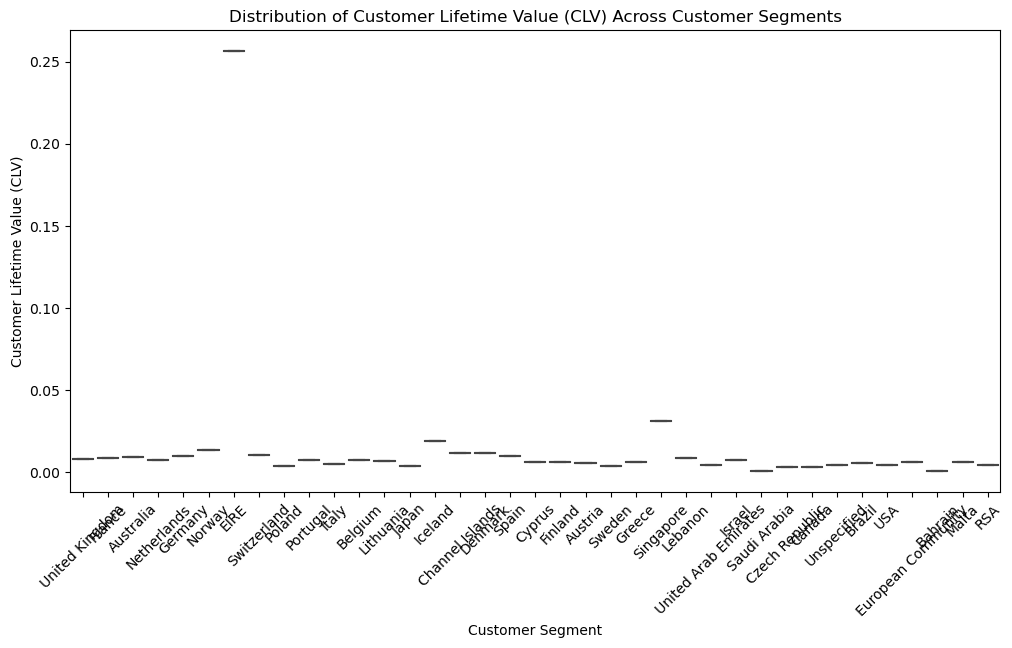

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate Total Sales and Number of Transactions
total_sales = df.groupby(['CustomerID', 'Segment'])['TotalSales'].sum()
num_transactions = df.groupby(['CustomerID', 'Segment'])['InvoiceNo'].count()

# Calculate Average Purchase Value (APV) for each customer
apv = total_sales / num_transactions

# Calculate Purchase Frequency (PF) for each segment
pf = df.groupby('Segment')['InvoiceNo'].count() / df.groupby('Segment')['CustomerID'].nunique()

# Calculate CLV for each segment
clv = apv.groupby(level='Segment').mean() * pf.groupby('Segment').mean() / (1 - retention_rate)

# Map CLV to each customer's segment
df['CLV'] = df['Segment'].map(clv)

# Plot the distribution of CLV across different segments
plt.figure(figsize=(12, 6))
sns.boxplot(x='Segment', y='CLV', data=df)
plt.title('Distribution of Customer Lifetime Value (CLV) Across Customer Segments')
plt.xlabel('Customer Segment')
plt.ylabel('Customer Lifetime Value (CLV)')
plt.xticks(rotation=45)
plt.show()


In [34]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,AvgTransactionValue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,0.192308,2010-12-01 08:26:00,0.000313,17850.0,United Kingdom,0.000060,0.000067
1,536365,71053,WHITE METAL LANTERN,0.192308,2010-12-01 08:26:00,0.000416,17850.0,United Kingdom,0.000080,0.000067
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,0.269231,2010-12-01 08:26:00,0.000338,17850.0,United Kingdom,0.000091,0.000067
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,0.192308,2010-12-01 08:26:00,0.000416,17850.0,United Kingdom,0.000080,0.000067
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,0.192308,2010-12-01 08:26:00,0.000416,17850.0,United Kingdom,0.000080,0.000067


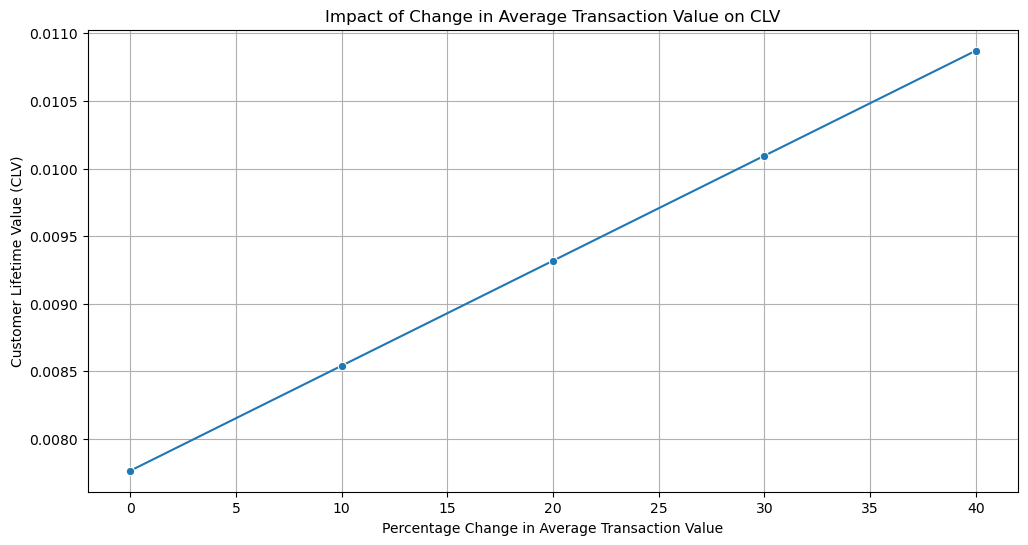

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame and it includes 'AvgTransactionValue' and 'CLV'

# 1. Define a function to calculate CLV
def calculate_clv(df, avg_transaction_value):
    # Use the given AvgTransactionValue to calculate APV and PF
    total_sales = df.groupby(['CustomerID', 'Segment'])['TotalSales'].sum()
    num_transactions = df.groupby(['CustomerID', 'Segment'])['InvoiceNo'].count()
    
    apv = avg_transaction_value
    pf = df.groupby('Segment')['InvoiceNo'].count() / df.groupby('Segment')['CustomerID'].nunique()
    
    retention_rate = 0.2
    clv = apv.mean() * pf.mean() / (1 - retention_rate)
    
    return clv

# 2. Calculate baseline CLV
baseline_avg_transaction_value = df['AvgTransactionValue'].mean()
baseline_clv = calculate_clv(df, baseline_avg_transaction_value)

# 3. Simulate changes in AvgTransactionValue
percent_changes = [0, 0.1, 0.2, 0.3, 0.4]  # 0%, 10%, 20%, 30%, 40% increase
results = []

for percent in percent_changes:
    new_avg_transaction_value = baseline_avg_transaction_value * (1 + percent)
    new_clv = calculate_clv(df, new_avg_transaction_value)
    results.append({
        'Change (%)': percent * 100,
        'New Avg Transaction Value': new_avg_transaction_value,
        'CLV': new_clv
    })

# Convert results to DataFrame for visualization
results_df = pd.DataFrame(results)

# 4. Plot the results
plt.figure(figsize=(12, 6))
sns.lineplot(x='Change (%)', y='CLV', data=results_df, marker='o')
plt.title('Impact of Change in Average Transaction Value on CLV')
plt.xlabel('Percentage Change in Average Transaction Value')
plt.ylabel('Customer Lifetime Value (CLV)')
plt.grid(True)
plt.show()


In [38]:
# Find the most repeated descriptions
most_repeated_description = df['Description'].value_counts().head(10)

# Display the result
print(most_repeated_description)


Description
WHITE HANGING HEART T-LIGHT HOLDER    1680
REGENCY CAKESTAND 3 TIER              1635
JUMBO BAG RED RETROSPOT               1329
PARTY BUNTING                         1278
LUNCH BAG RED RETROSPOT               1207
ASSORTED COLOUR BIRD ORNAMENT         1159
SET OF 3 CAKE TINS PANTRY DESIGN      1128
POSTAGE                               1099
LUNCH BAG  BLACK SKULL.               1048
SPOTTY BUNTING                         976
Name: count, dtype: int64


In [39]:
# Find the top 10 most frequent countries
top_10_countries = df['Country'].value_counts().head(10)

# Display the result
print(top_10_countries)


Country
United Kingdom    334095
Germany             8519
France              7843
EIRE                6400
Spain               2379
Belgium             1954
Switzerland         1649
Portugal            1380
Norway               914
Netherlands          787
Name: count, dtype: int64


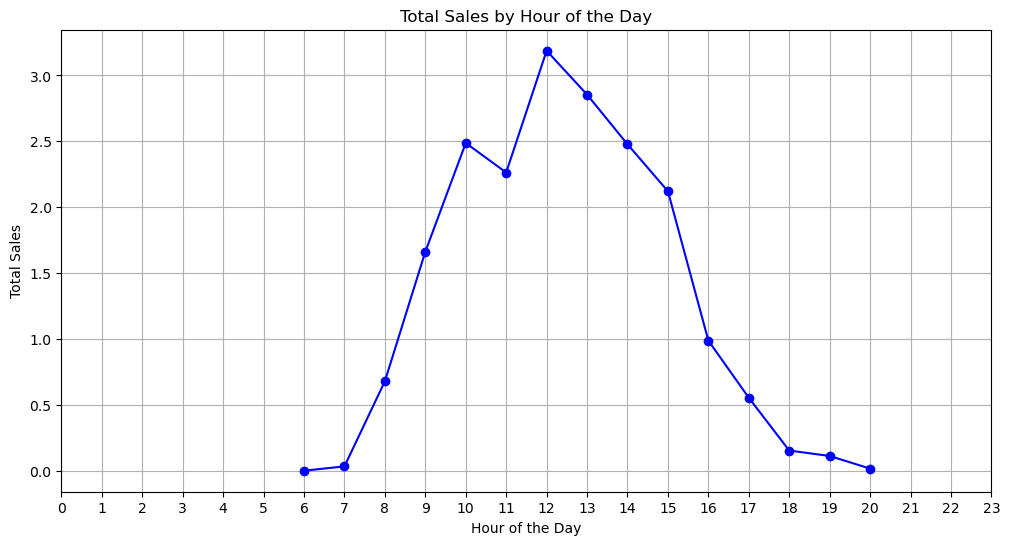

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure InvoiceDate is in datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract the hour from the InvoiceDate
df['Hour'] = df['InvoiceDate'].dt.hour

# Group by hour and sum the total sales
hourly_sales = df.groupby('Hour')['TotalSales'].sum().sort_index()

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(hourly_sales.index, hourly_sales.values, marker='o', linestyle='-', color='b')
plt.title('Total Sales by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Sales')
plt.xticks(range(24))  # Set x-ticks as hours of the day
plt.grid(True)
plt.show()


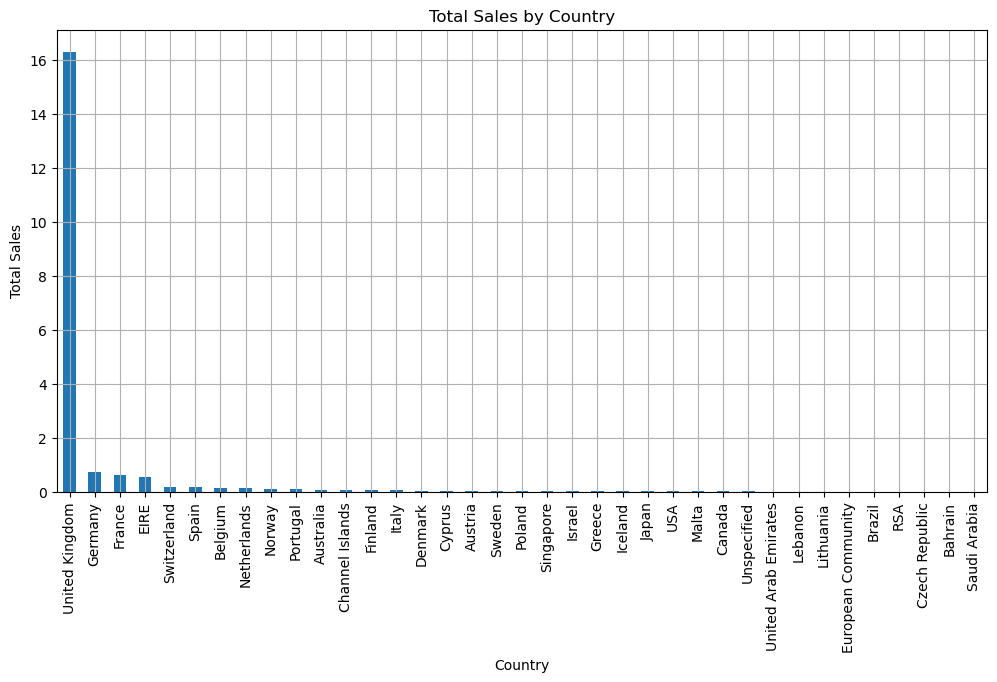

In [44]:
country_sales = df.groupby('Country')['TotalSales'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
country_sales.plot(kind='bar')
plt.title('Total Sales by Country')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


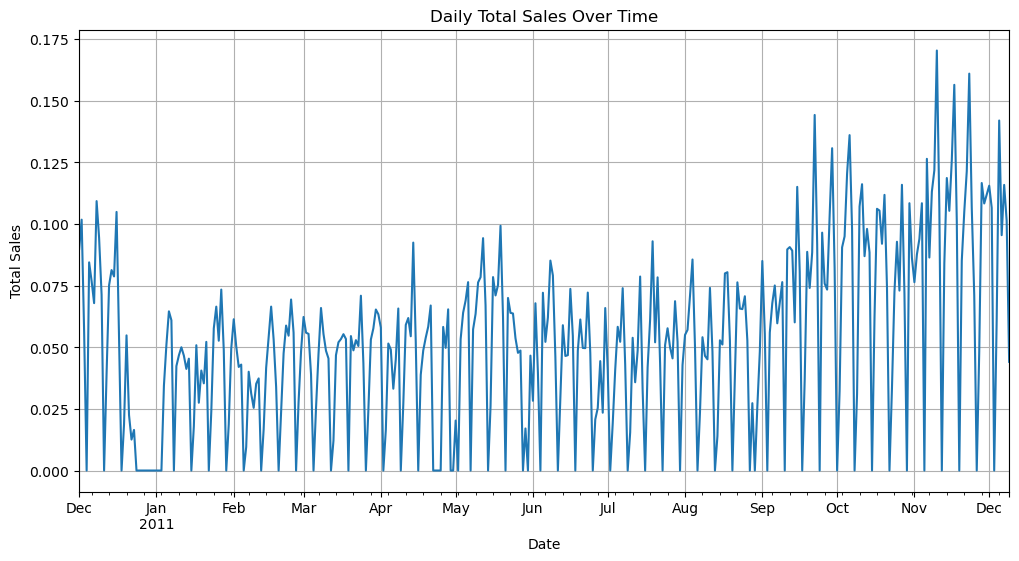

In [46]:
df.set_index('InvoiceDate', inplace=True)
daily_sales = df['TotalSales'].resample('D').sum()
plt.figure(figsize=(12, 6))
daily_sales.plot()
plt.title('Daily Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()
